In [26]:
#import K-Means
from sklearn.cluster import KMeans
# important metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from PIL import Image
from matplotlib.image import imread
from matplotlib import rcParams
import matplotlib.pyplot as plt
import glob, os, pickle
import numpy as np
import cv2 # pip install opencv-python

from yellowbrick.cluster import KElbowVisualizer # pip install yellowbrick # for elbow-method

print("Imports sucessful")

plt.rcParams['figure.figsize'] = [4, 4]

Imports sucessful


In [13]:
# Load images into data matrix and labels list
data = []
labels = []

for image in glob.glob('imageset2/*/*.jpg'): # for all .jpg images in imageset2 folder 
    labels.append(str(image[10:12])) # Get image label

    img=cv2.imread(image)
    
    img=cv2.resize(img,(250,250)) # 250 * 250 * 3 color channels = 187500 for plots' x-axis
    img=img.astype('float32')
    data.append(img)
data = np.array(data)

In [18]:
# Data preprocessing
# Labels: 3S and KC
# 3S = 1    KC = 0
data_label = []
for i in labels:
    if i=="KC": data_label.append(0)
    else: data_label.append(1)
data_label = np.array(data_label)

data = [x/255.0 for x in data]
data = np.array(data)

reshaped_data = data.reshape(len(data),-1)

/Users/liam/Desktop/School/Spring_2023/ECE_172/Playing-Card-Machine-Learning/Playing-Card-Identification-Using-Machine-Learning/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2 Clusters result in a 51.0% accuracy


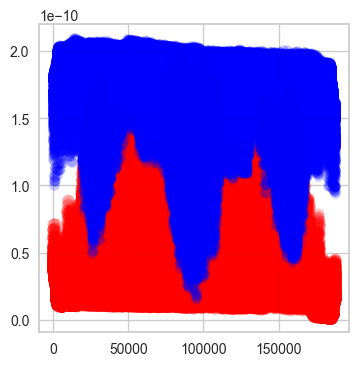

In [32]:
# mapping labels from cluster to original labels
def get_reference_dict(clusters,data_label):
    reference_label = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(clusters))):
        index = np.where(clusters == i,1,0)
        num = np.bincount(data_label[index==1]).argmax()
        reference_label[i] = num
    return reference_label
# Mapping predictions to original labels
def get_labels(clusters,refernce_labels):
    temp_labels = np.random.rand(len(clusters))
    for i in range(len(clusters)):
        temp_labels[i] = reference_labels[clusters[i]]
    return temp_labels


# Compute KMeans
clusterCount = 2

kmeans = KMeans(n_clusters=clusterCount, random_state=0)
clusters = kmeans.fit_predict(reshaped_data)
kmeans.cluster_centers_.shape

# Plot
x_data = [i for i in range(187500)] # 250 * 250 * 3
plt.scatter(x_data,kmeans.cluster_centers_[0], color = 'red',alpha=0.2,s=70)
plt.scatter(x_data,kmeans.cluster_centers_[1] , color = 'blue',alpha=0.2,s=50)


reference_labels = get_reference_dict(clusters,data_label)
predicted_labels = get_labels(clusters,reference_labels)
acc = accuracy_score(predicted_labels,data_label)
print(f"{clusterCount} Clusters result in a {round(acc, 2)*100}% accuracy")

In [43]:
# Test images
testLabels = np.asarray([1, 0])
testData = []

# Load test images
img_3S_test = cv2.imread('Testset/IMG_6051.jpg') # 3 of Spades test image
img_KC_test = cv2.imread('Testset/IMG_6056.jpg') # King of Clubs test image

img_3S_test = cv2.resize(img_3S_test, (250, 250))
img_KC_test = cv2.resize(img_KC_test, (250, 250))

img_3S_test = img_3S_test.astype('float32')
img_KC_test = img_KC_test.astype('float32')

testData.append(img_3S_test)
testData.append(img_KC_test)

testData = np.array(testData)

testData = [x/255.0 for x in testData]
testData = np.array(testData)

reshaped_test_data = testData.reshape(len(testData),-1)

# Run k-means on test data
clusters_test = kmeans.fit_predict(reshaped_test_data)
kmeans.cluster_centers_.shape

reference_test_labels = get_reference_dict(clusters_test,testLabels)
predicted_test_labels = get_labels(clusters_test,reference_test_labels)
acc_test = accuracy_score(predicted_test_labels,testLabels)
print(f"{clusterCount} Clusters result in a {round(acc_test, 2)*100}% accuracy")


/Users/liam/Desktop/School/Spring_2023/ECE_172/Playing-Card-Machine-Learning/Playing-Card-Identification-Using-Machine-Learning/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2 Clusters result in a 100.0% accuracy
[1. 0.]
